<a href="https://colab.research.google.com/github/OliverAndress/DS-1002/blob/main/06_pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [ ]:
import pandas as pd


---

In [ ]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [ ]:

my_list = [98, 24, 46, 87, 33]


panda = pd.Series(my_list)

print(panda)


0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [ ]:
custom_index = range(2, len(my_list)*3 + 2, 3)

# Convert list to pandas series with custom index
series = pd.Series(my_list, index=custom_index)
print(series)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [ ]:

data = {
    "Name": ["Oliver", "Emma", "Bob", "Sophia"],
    "Age": [18, 25, 35, 28],
    "Career": ["Data Scientist", "Doctor", "Teacher", "Accountant"]
}

df = pd.DataFrame(data)

print(df)


     Name  Age          Career
0  Oliver   18  Data Scientist
1    Emma   25          Doctor
2     Bob   35         Teacher
3  Sophia   28      Accountant


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [ ]:
df = pd.DataFrame(data)


df.index.name = 'participant_id'

print(df)

                  Name  Age          Career
participant_id                             
0               Oliver   18  Data Scientist
1                 Emma   25          Doctor
2                  Bob   35         Teacher
3               Sophia   28      Accountant


6. Use a pandas function to determine the data types of the columns of `df`.

In [ ]:
df = pd.DataFrame(data)

column_data_types = df.dtypes

print(column_data_types)

Name      object
Age        int64
Career    object
dtype: object


7. Using bracket notation, reference column `name`

In [ ]:
name_column = df['Name']

print(name_column)

0    Oliver
1      Emma
2       Bob
3    Sophia
Name: Name, dtype: object


8. Using dot notation, reference column `name`

In [ ]:
name_column = df.Name

print(name_column)

0    Oliver
1      Emma
2       Bob
3    Sophia
Name: Name, dtype: object


8. Reference column `name` and have it returned in a dataframe.

In [ ]:
name_column_df = df[['Name']]

print(name_column_df)

     Name
0  Oliver
1    Emma
2     Bob
3  Sophia


9. Show the 3rd element in column `career`.

In [ ]:
third_element_career = df['Career'].iloc[2]

print(third_element_career)

Teacher


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [ ]:
iris['sepal_length'].corr(iris['sepal_width'])

-0.11756978413300208

12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [ ]:
setosa_correlation = iris[iris['species'] == 'setosa']['sepal_length'].corr(iris[iris['species'] == 'setosa']['sepal_width'])
print("Setosa:", setosa_correlation)
versicolor_correlation = iris[iris['species'] == 'versicolor']['sepal_length'].corr(iris[iris['species'] == 'versicolor']['sepal_width'])
print("Versicolor:", versicolor_correlation)
virginica_correlation = iris[iris['species'] == 'virginica']['sepal_length'].corr(iris[iris['species'] == 'virginica']['sepal_width'])
print("Virginica:", virginica_correlation)


Setosa: 0.7425466856651597
Versicolor: 0.5259107172828243
Virginica: 0.4572278163941129


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [ ]:
# Group by species
grouped_species = iris.groupby('species')

# Initialize variables to store results
max_neg_corr_species = {}
max_neg_corr_value = {}

# Iterate over each species
for species, data in grouped_species:
    # Calculate correlation matrix
    correlation_matrix = data.corr(numeric_only=True)
    # Find the least positive (most negative) correlation coefficient, excluding self-correlation (diagonal)
    min_corr = correlation_matrix.mask(np.eye(len(correlation_matrix), dtype=bool)).min().min()
    # Find the indices of the least positive (most negative) correlation coefficient
    row, col = np.where(correlation_matrix == min_corr)
    # Identify the variable names
    var1 = correlation_matrix.columns[row[0]]
    var2 = correlation_matrix.index[col[0]]
    # Store results
    max_neg_corr_species[species] = (var1, var2)
    max_neg_corr_value[species] = min_corr

# Print results
for species, (var1, var2) in max_neg_corr_species.items():
    print("For", {species}, "the variables", {var1}, "and", {var2}, "have the most negative correlation coefficient:", {max_neg_corr_value[species]})



For {'setosa'} the variables {'sepal_width'} and {'petal_length'} have the most negative correlation coefficient: {0.1776999667822706}
For {'versicolor'} the variables {'sepal_length'} and {'sepal_width'} have the most negative correlation coefficient: {0.5259107172828247}
For {'virginica'} the variables {'sepal_length'} and {'petal_width'} have the most negative correlation coefficient: {0.2811077091573193}


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


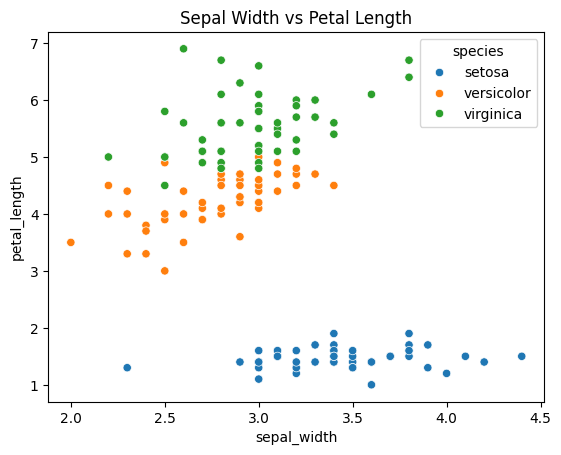

I looked up why this could be the case and I found out about the Simpson's paradox, 
which occurs when the relationship between two variables changes direction when data is aggregated across different groups.  
while within each species of iris flowers, sepal width and petal length may show a positive relationship, 
but when all species are combined, the overall correlation between these variables can appear negative due to differences in species characteristics.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sepal width vs petal length for each species
sns.scatterplot(data=iris, x='sepal_width', y='petal_length', hue='species')
plt.title('Sepal Width vs Petal Length')
plt.show()
print("I looked up why this could be the case and I found out about the Simpson\'s paradox, \nwhich occurs when the relationship between two variables changes direction when data is aggregated across different groups.  \nwhile within each species of iris flowers, sepal width and petal length may show a positive relationship, \nbut when all species are combined, the overall correlation between these variables can appear negative due to differences in species characteristics.")